# The MNIST real s**t

Today we try MNIST, the "hello world" of machine learning

tensorflow has a default way to load MNIST data set;

In [1]:
import tensorflow
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import numpy as np

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [37]:
x_train=mnist.train.images
y_train=mnist.train.labels

Well, in machine learning, we always seperate a small group of x,y pairs

And call then validation data.

When we are training using the training data, we don't want them to overfit.

To explain overfiting in very simple language, imagine your model is a child, he's learning in school about reading number.(Hence the term machine learning...). The training data is like the knowledge we teach him in school. But we have no idea how good he will perform outside of school. So we have something called validation data, and we totally kept these data away from this kid during the training. And we use the validation data, which he has not seen before, to exam this child.

Now, if the kid score highly in school, but perform poorly in society(validation data) on this task, we call it overfitting...

If the kid score highly in school, and perform well in society, we say this model can"generalize well".

If the kid score poorly even in school, we call this under fitting.

The following image is often used when explain this idea

If we measure by mean square error(mse) between estimated y and real y, the third image's mse is definitely the smallest. But the model is learning too much into the data, and won't generalize well outside of training data

<img src='https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png'>

In [39]:
x_valid=mnist.validation.images
y_valid=mnist.validation.labels
x_valid.shape,y_valid.shape

((5000, 784), (5000, 10))

In [3]:
%matplotlib inline

In [6]:
# you don't have to worry the following piece of code in this cell
# We simply build a function, to plot number arrays to image
# The visualization isn't the point of this class
# just load the function, then you can use plot(input_image_array), and shift enter, it will show the image in notebook
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [38]:
x_train.shape,y_train.shape
# shape of x, shape of y
# x is 55000 img, each img is 28*28=784 numbers, 
# in this stage, we are not looking at colors yet,

((55000, 784), (55000, 10))

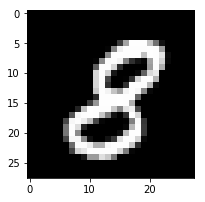

In [12]:
# We pick 6th number (index 5)
# Reshape this number back to 28*28
# Then we plot this image in grey scale
# For this image I take a guess...My money is on "8"
plot(x_train[5].reshape(28,28))

In [13]:
# Let's check the label
# The label is in onehot encoding, 
y_train[5]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

So in sense of 0,1,2,....8,9. The label is 8

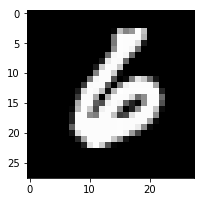

In [14]:
# Let's check the 100th number
plot(x_train[99].reshape(28,28))

In [16]:
# The 100th label
y_train[99]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [17]:
from keras.layers import Input,Activation,Dense,Dropout,BatchNormalization

In [27]:
from keras.models import Model,Sequential

Simple inputlayer(184) to output layer(10)

In [32]:
md=Sequential([
    Dense(10,activation="softmax",input_shape=(784,))
])

In [33]:
md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [40]:
# This refelct only the simpliest linear relationship
# between each pixel's value(0~1) to each digit's possibility
weights=md.get_weights()
weights[0].shape

(784, 10)

### Training

#### Loss function is how we measure how wrong is prediciton y_ from the real y

This wrongness is quantifiable

1. for classification problem(which number it is) set the loss function to "categorical_crossentropy"
2. for regression problem, set the loss function to "mse"(mean square error)

I guess you've already familiar with MSE, the far away you guess is, the bigger mse is. If each of the real y is a number around 20, model's guess is at 10000, the mse is going to be huge.

cross-entropy is something similar, but telling you: how wrong your guess of category is. 

The fomular of cross-entropy isn't very complicated, and handled by some of the machine learning library, but you're welcomed to check it up.

Loss function is crucial to machine learning, knowing how wrong you model is or the direction of the wrongness, will make your model learn.

In [45]:
md.compile(loss="categorical_crossentropy",# set the loss function
           optimizer="Adam", # optimizer is another story, for now, optimizer is a way of improving your model, bit by bit
           metrics=["accuracy"]
          )

In [46]:
md.fit(x_train,y_train,
       validation_data=(x_valid,y_valid), # validation data, not involved in training, but exam the model for each epoch
       epochs=2,# how many time we are going to run through the entire training data
       batch_size=16,#how many image's we process per batch
      )

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 5s - loss: 0.2966 - acc: 0.9164 - val_loss: 0.2687 - val_acc: 0.9244
Epoch 2/2
55000/55000 [==============================] - 5s - loss: 0.2792 - acc: 0.9214 - val_loss: 0.2661 - val_acc: 0.9248


you can try to run the fit youself.

After 2 epochs of traning, it reaches a training accruacy (in-school exam) of 92.14%, and validation accruacy of 92.48%

now let's gut this beautiful thing open:

In [50]:
weights=md.get_weights()
# model could have been for multiple layers there might be more matrices inside
# the second layer is for bias of each number
len(weights),weights[0].shape

(2, (784, 10))

#### Visualize the weights

the 784*10 matrix is the mapping relationships between 784 pixels and 10 digits

In [52]:
w_slice=[]
for i in range(10):
    w_slice.append(weights[0][:,i:i+1])

If we slice out each pixel's contribution to the result by digits, we can have a heat map of pixel's importance, isn't that cool?!

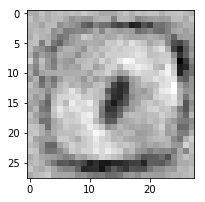

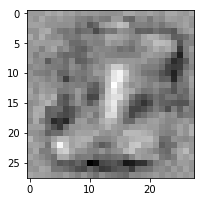

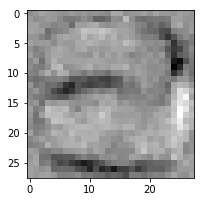

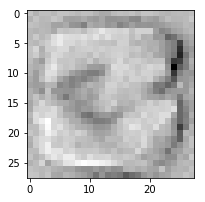

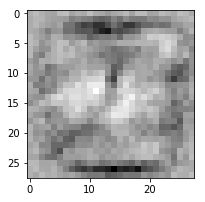

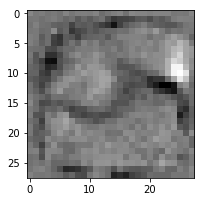

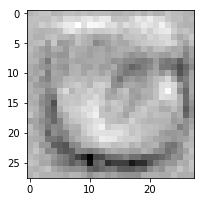

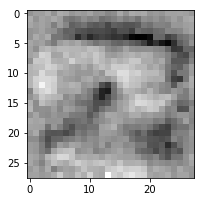

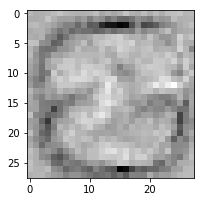

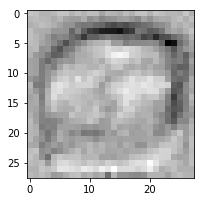

In [54]:
for i in range(10):plot(w_slice[i].reshape(28,28))

### Deeper!!

Now, let's not dwell on 92%, it's kinda suck

In [58]:
md=Sequential([
    Dense(2000,activation="relu",input_shape=(784,)),# relu is like max(x,0) in excel
    Dense(10,activation="softmax"),#output layer neuron number must be 10 to match y's dimension
])
md.compile(loss="categorical_crossentropy",
           optimizer="Adam", 
           metrics=["accuracy"]
          )

#### Train again for 2 epochs

In [59]:
md.fit(x_train,y_train,
       validation_data=(x_valid,y_valid), epochs=2,batch_size=16,
      )

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 214s - loss: 0.1845 - acc: 0.9436 - val_loss: 0.1030 - val_acc: 0.9684
Epoch 2/2
55000/55000 [==============================] - 211s - loss: 0.0840 - acc: 0.9736 - val_loss: 0.0822 - val_acc: 0.9742


In [60]:
weights=md.get_weights()

In [61]:
for w in weights:
    print(w.shape)

(784, 2000)
(2000,)
(2000, 10)
(10,)


#### Running resuilt

First, you can find the model is training much slower

Secondly, the accuracy is way up, isn't that beutiful? Because if we use the hidden layer, the relationship between pixels will be considered.(if we use traditional feature engineering, like thinking of x1x2..., this will be way harder, and depend heavily on field expertise, and won't fit as good)

Also, since we use the hidden layer, it ain't no mapping relationship between each pixel and each digit any more. I sure can't visualize this. It's harder to explain the model now, but the model can perform much better. That's why people say things like deep learning or hidden layer.

#### Looking forward

of course, 0.9742 still sucks... but I'm glad to tell you, if you meet a university professor majoring in this science, and he's not following updates in recent 5 years. Often cases...He can't beat you... The reason I know this is because I've witness this for more than 1 time...

#### Convolution

And in recent month, I or other online MOOC can teach you more advanced skills based on ths model, it will give you 99.5%+ score(check kaggle mnist competition, 99.5% can get you into top 70 out of 1600+ competitors). 

The more advanced skill is concerning a technique called "convolution", the reason why I do not teach you convolution today, is not because it's hard... it's only because convolution is computational expensive. You'll learn to hookup fancier device before you can try convolution

#### Preview

please click this link for a taste of [convolution](http://course.fast.ai/lessons/lesson0.html). It's a video less than an hour, (first half, introduction, second half, run codes on jupyter to show convolution, it's very amazing)

### After session

There are some amazing videos about deep learning and MNIST dataset by 3blue1brown, check it here:

[Video1:But what *is* a Neural Network? | Deep learning, Part 1](https://www.youtube.com/watch?v=aircAruvnKk)

[Video2:Gradient descent, how neural networks learn | Deep learning, part 2](https://www.youtube.com/watch?v=IHZwWFHWa-w)